# Графики данных датчиков GPS и OBD

In [657]:
from math import sqrt, pi, exp
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
data = pd.read_csv('data1.csv', delimiter=',')
N = len(data)

In [658]:
#Данные скорости с GPS и OBD
z_GPS = np.array(data['GPS Speed (Meters/second)'])
z_OBD = np.array(data['Speed (OBD)(km/h)']) / 3.6

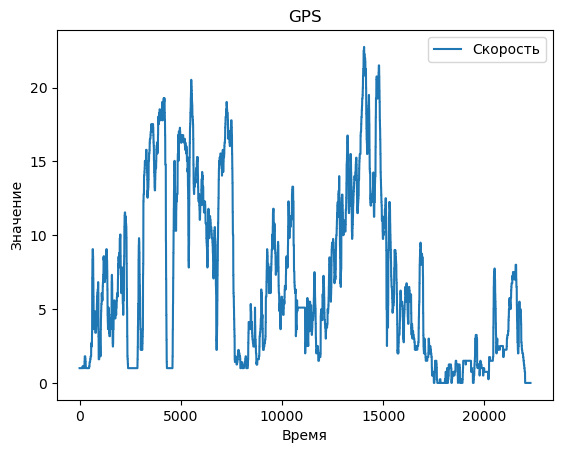

In [659]:
plt.plot(range(1, N + 1), z_GPS, label="Скорость")
plt.xlabel("Время")
plt.ylabel("Значение")
plt.title("GPS")
plt.legend()
plt.show()

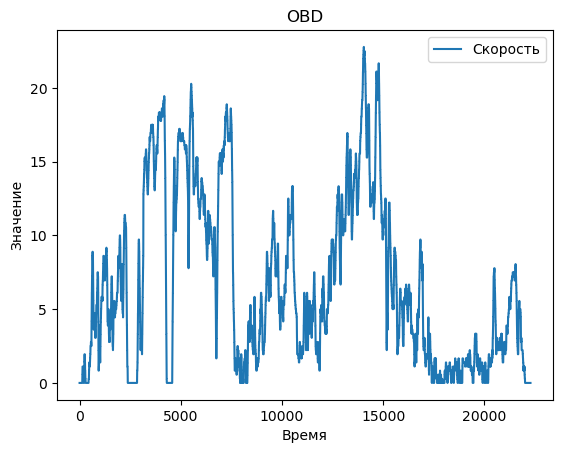

In [660]:
plt.plot(range(1, N + 1), z_OBD, label="Скорость")
plt.xlabel("Время")
plt.ylabel("Значение")
plt.title("OBD")
plt.legend()
plt.show()

# ФИЛЬТР КАЛМАНА ПО ЛЕКЦИИ
# ПЫТАТЬСЯ ПОМОЧЬ ОТСЮДА
# НУЖНЫ СВЕЖИЕ ИДЕИ
Продам гараж

In [661]:
from math import sqrt, pi, exp
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [662]:
data = pd.read_csv('data1.csv', delimiter=',')
N = len(data)

In [663]:
#Если захочется посмотреть на наши данные
data

,GPS Time,Device Time,Longitude,Latitude,GPS Speed (Meters/second),Horizontal Dilution of Precision,Altitude,Bearing,G(x),G(y),G(z),G(calibrated),Engine RPM(rpm),Speed (OBD)(km/h),Acceleration Sensor(Total)(g),Litres Per 100 Kilometer(Instant)(l/100km),Speed (GPS)(km/h),Acceleration Sensor(Z axis)(g)
0,Fri Mar 25 17:18:15 GMT+03:00 2016,25-Mar-2016 17:18:08.672,37.583105,55.848558,1.0,14.0,143.0,0.0,-1.069122,8.187592,4.949341,0.002015,-,0.0,0.002015,-,3.5999999046325684,0.405627
1,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:08.767,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.529938,8.353485,5.078201,0.027657,-,0.0,0.027657,-,3.5999999046325684,0.417656
2,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:08.867,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.483780,8.233429,4.653717,0.016112,-,0.0,0.016112,-,3.5999999046325684,0.374385
3,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:08.966,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.489288,8.442078,4.666107,0.015226,-,0.0,0.015226,-,3.5999999046325684,0.375648
4,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:09.067,37.583102,55.848554,1.0,14.0,143.0,0.0,-0.720825,8.725891,4.743317,0.034077,-,0.0,0.034077,-,3.5999999046325684,0.383519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22276,Fri Mar 25 17:55:28 GMT+03:00 2016,25-Mar-2016 17:55:21.259,37.525679,55.738373,0.0,4.0,166.0,0.0,0.998703,9.563507,1.149261,0.006151,599.5,0.0,0.006151,-,0.0,0.017152
22277,Fri Mar 25 17:55:28 GMT+03:00 2016,25-Mar-2016 17:55:21.358,37.525679,55.738373,0.0,4.0,166.0,0.0,1.070480,9.641998,1.154083,0.006844,601.25,0.0,0.006844,-,0.0,0.017644
22278,Fri Mar 25 17:55:28 GMT+03:00 2016,25-Mar-2016 17:55:21.458,37.525679,55.738373,0.0,4.0,166.0,0.0,1.026428,9.537384,1.169113,0.006450,601.25,0.0,0.006450,-,0.0,0.019176
22279,Fri Mar 25 17:55:28 GMT+03:00 2016,25-Mar-2016 17:55:21.557,37.525679,55.738373,0.0,4.0,166.0,0.0,0.681564,8.894714,1.603546,-0.057069,609.0,0.0,-0.057069,-,0.0,0.063460


In [664]:
data.iloc[240:280:1, :]
#Опрос RPM - 0.2-0.3 секунды
#Опрос OBD сложно точно сказать, ибо он показывает очень грубую скорость (целое число)
#Частота изменения значений OBD колеблется от 0.3с до 0.7с...
#Идеи две: 1. Использовать фильтр для всех данных (0.1с); 2. Считать, что опрос равен одной секунде (брать каждое 10-е значение)

,GPS Time,Device Time,Longitude,Latitude,GPS Speed (Meters/second),Horizontal Dilution of Precision,Altitude,Bearing,G(x),G(y),G(z),G(calibrated),Engine RPM(rpm),Speed (OBD)(km/h),Acceleration Sensor(Total)(g),Litres Per 100 Kilometer(Instant)(l/100km),Speed (GPS)(km/h),Acceleration Sensor(Z axis)(g)
240,Fri Mar 25 17:18:39 GMT+03:00 2016,25-Mar-2016 17:18:32.667,37.583086,55.848410,1.118034,3.0,179.0,215.5,1.003708,9.488358,1.275162,0.010020,999.5,6.0,0.010020,30.759849548339844,4.0249223709106445,0.029986
241,Fri Mar 25 17:18:40 GMT+03:00 2016,25-Mar-2016 17:18:32.766,37.583073,55.848403,1.414214,4.0,179.0,260.1,0.598007,9.691986,1.512848,0.006825,999.5,6.0,0.006825,30.759849548339844,5.091168403625488,0.054215
242,Fri Mar 25 17:18:40 GMT+03:00 2016,25-Mar-2016 17:18:32.866,37.583073,55.848403,1.414214,4.0,179.0,260.1,0.766724,9.532211,1.129822,0.000601,999.5,6.0,0.000601,26.98339080810547,5.091168403625488,0.015170
243,Fri Mar 25 17:18:40 GMT+03:00 2016,25-Mar-2016 17:18:32.967,37.583073,55.848403,1.414214,4.0,179.0,260.1,1.080948,9.744705,1.189545,0.012838,1007.5,6.0,0.012838,26.98339080810547,5.091168403625488,0.021258
244,Fri Mar 25 17:18:40 GMT+03:00 2016,25-Mar-2016 17:18:33.067,37.583073,55.848403,1.414214,4.0,179.0,260.1,0.786972,9.334915,1.275528,0.007403,1007.5,6.0,0.007403,28.44524574279785,5.091168403625488,0.030023
245,Fri Mar 25 17:18:40 GMT+03:00 2016,25-Mar-2016 17:18:33.167,37.583073,55.848403,1.414214,4.0,179.0,260.1,1.236527,9.639648,1.068893,0.015660,1014.75,7.0,0.015660,28.44524574279785,5.091168403625488,0.008960
246,Fri Mar 25 17:18:40 GMT+03:00 2016,25-Mar-2016 17:18:33.268,37.583073,55.848403,1.414214,4.0,179.0,260.1,1.091232,9.712463,1.819778,0.032409,1014.75,7.0,0.032409,28.44524574279785,5.091168403625488,0.085502
247,Fri Mar 25 17:18:40 GMT+03:00 2016,25-Mar-2016 17:18:33.368,37.583073,55.848403,1.414214,4.0,179.0,260.1,0.695511,9.127945,1.375153,0.012798,1037.75,7.0,0.017357,25.63465690612793,5.091168403625488,0.010358
248,Fri Mar 25 17:18:40 GMT+03:00 2016,25-Mar-2016 17:18:33.467,37.583073,55.848403,1.414214,4.0,179.0,260.1,0.932053,9.416290,0.839142,0.006305,1037.75,7.0,0.006305,25.63465690612793,5.091168403625488,-0.014461
249,Fri Mar 25 17:18:40 GMT+03:00 2016,25-Mar-2016 17:18:33.567,37.583073,55.848403,1.414214,4.0,179.0,260.1,0.934799,9.558548,1.234711,0.006074,1047.0,7.0,0.006074,17.43783187866211,5.091168403625488,0.025862


In [665]:
#ФИЛЬТР КАЛМАНА
def predict1(vk0, sigmak0, sigma_Model, uk0 = 0):
    """
    vk0: прошлое значение переменной, например сокрости
    sigmak0: корень из дисперсии ??? на прошлом шаге 
    sigma_Model: корень из дисперсии объекта
    uk0: управляющий сигнал на прошлом шаге
    """
    vk1 = vk0 + uk0 + np.random.normal(0, sigma_Model)
    sigmak1 = sqrt(sigmak0**2 + sigma_Model**2)
    return vk1, sigmak1


def update1(sigmak1, sigman1, vk, zk):
    """
    sigmak1: корень из дисперсии ??? на данном шаге
    sigman1: корень из дисперсии датчиков на данном шаге
    vk: предсказанная значение функции движение , т.е. vk после предикта
    zk: значение с датчика
    """
    kk = sigmak1**2/(sigman1**2 + sigmak1**2)
    vk = vk*(1-kk) + zk*kk
    sigmak1 = sqrt(kk*sigman1**2)
    
    return vk, sigmak1




In [666]:
#приведем некоторые данные в тип, с которым нам будет удобнее работать
data['GPS Speed (Meters/second)'] = ['0' if elem == '-' else elem 
                                     for i, elem in enumerate(data['GPS Speed (Meters/second)'])]
data['GPS Speed (Meters/second)'] = data['GPS Speed (Meters/second)'].astype (float)
data['Speed (OBD)(km/h)'] = data['Speed (OBD)(km/h)'].astype (float)
data['Engine RPM(rpm)'] = ['0' if elem == '-' else elem 
                           for i, elem in enumerate(data['Engine RPM(rpm)'])]
data['Engine RPM(rpm)'] = data['Engine RPM(rpm)'].astype (float)

In [667]:
def plot_graf(v, z_GPS, z_OBD):
    #Строим графики
    plt.plot(range(1, 500 + 1), v[:500], label="Фильтрованная оценка")
    plt.plot(range(1, 500 + 1), z_GPS[:500], label="Измерение GPS")
    plt.plot(range(1, 500 + 1), z_OBD[:500], label="Измерение ODB")
    plt.xlabel("Время")
    plt.ylabel("Значение")
    plt.title("Фильтр Калмана для первых 500 значений")
    plt.legend()
    plt.show()
    #Строим графики
    plt.plot(range(1, N + 1), v, label="Фильтрованная оценка")
    plt.plot(range(1, N + 1), z_GPS, label="Измерение GPS")
    plt.plot(range(1, N + 1), z_OBD, label="Измерение ODB")
    plt.xlabel("Время")
    plt.ylabel("Значение")
    plt.title("Фильтр Калмана")
    plt.legend()
    plt.show()


In [668]:
#3.1
def total_sensor_sigma(sigmaGPS, M, sigmaOBD, U):
    """
    sigmaGPS: корень из дисперсии GPS датчика 
    M: мат ошидание датчика GPS, СКОРЕЕ всего это полученное значение с датчика
    sigmaOBD: корень из дисперсии ODB датчика 
    U: мат ошидание датчика ODB, СКОРЕЕ всего это полученное значение с датчика
    """


    M_new = U*(sigmaGPS**2/(sigmaGPS**2+sigmaOBD**2)) + M*(sigmaOBD**2/(sigmaGPS**2+sigmaOBD**2))
    
    sigma_new = 1/(1/sigmaOBD**2 + 1/sigmaGPS**2)

    return  (M_new, sigma_new)


def data_processor(data, flag = 0, sigmaModel = 14*3.6, sigmaOBD = 2, sigmaK = 0):

    #Не думаю, что мы очень сильно уверены в точности модели движения
    #Так что скорее всего СигмаМодели будет больше остальных.
    #Скорее всего, СигмаОБД будет меньше ЖПСовской, ибо хоть ОБД и считает только целую скорость
    #но обновляется несколько раз за секунду, в отличии от ЖПС


    v = [0]*N
    v1 = [0]*N
    #Берем скорость из данных в датафрейме
    z_GPS = data['GPS Speed (Meters/second)'].astype (float)
    z_OBD = (data['Speed (OBD)(km/h)'].astype (float))/3.6
    sigmaGPS_arr = data[' Horizontal Dilution of Precision'].astype (float)
    #rpm = data['Engine RPM(rpm)'].astype (float)
    total_sigma_sens = sigmaGPS_arr.copy()
    if flag == 0:
        
        #пересчет скоростией и сигм
        for i in range(N):
            v1[i], total_sigma_sens[i] = total_sensor_sigma(sigmaGPS_arr[i], z_GPS[i], sigmaOBD, z_OBD[i])

    elif flag == 1:
        idx0 = min(data[data['GPS Time'] == 'Fri Mar 25 17:25:00 GMT+03:00 2016'].index)
        idx1 = max(data[data['GPS Time'] == 'Fri Mar 25 17:35:00 GMT+03:00 2016'].index)
        
        for i in range(N):
            if idx0 <= i <= idx1:
               v1[i], total_sigma_sens[i] = z_OBD[i], sigmaOBD
                
            else:
                v1[i], total_sigma_sens[i] = total_sensor_sigma(sigmaGPS_arr[i], z_GPS[i], sigmaOBD, z_OBD[i])
        

    elif flag == 2:
        idx0 = min(data[data['GPS Time'] == 'Fri Mar 25 17:40:00 GMT+03:00 2016'].index)
        idx1 = max(data[data['GPS Time'] == 'Fri Mar 25 17:50:00 GMT+03:00 2016'].index)

        for i in range(N):
            if idx0 <= i <= idx1:
                v1[i], total_sigma_sens[i] = z_GPS[i], sigmaGPS_arr[i]
                
                
            else:
                v1[i], total_sigma_sens[i] = total_sensor_sigma(sigmaGPS_arr[i], z_GPS[i], sigmaOBD, z_OBD[i])
 

    #Применяем фильтр Калмана
    for t in range(1, N-1):
        v[t+1], sigmaK = predict1(v[t], sigmaK, sigmaModel)
        v[t+1], sigmaK = update1(sigmaK, total_sigma_sens[t], v[t+1], v1[t+1])

    return v, z_GPS, z_OBD


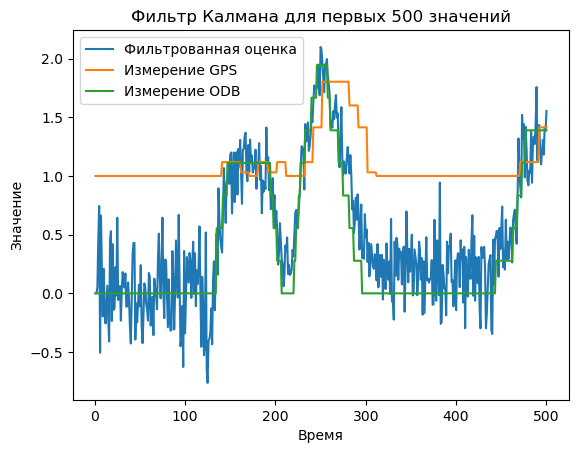

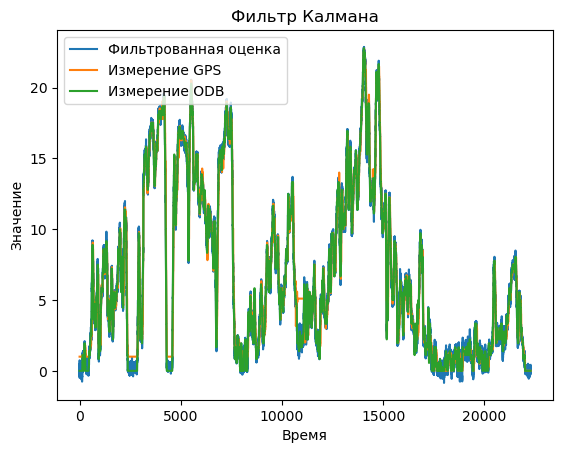

In [669]:
v, z_GPS, z_OBD = data_processor(data)
plot_graf(v, z_GPS, z_OBD)

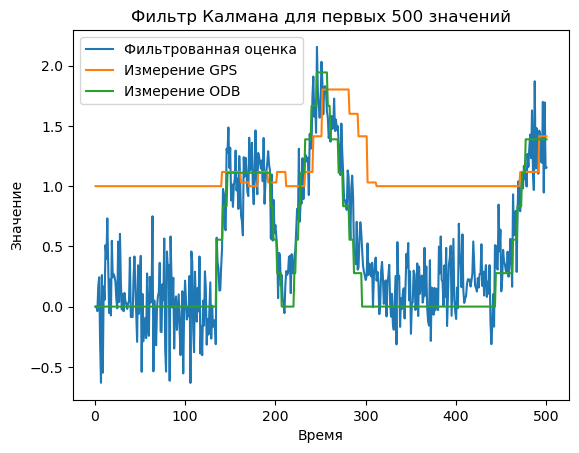

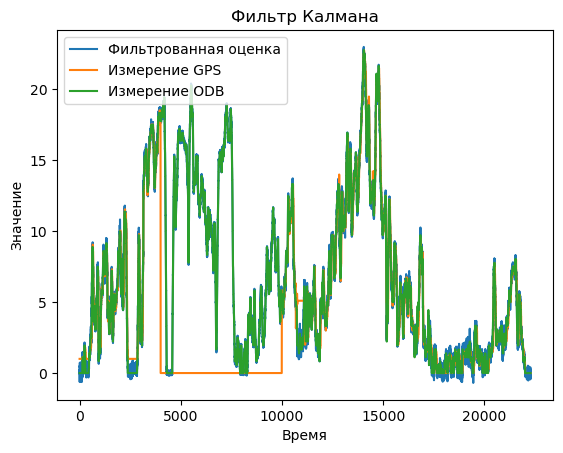

In [670]:
data.loc[(data['GPS Time'] > 'Fri Mar 25 17:25:00 GMT+03:00 2016') & (data['GPS Time'] < 'Fri Mar 25 17:35:00 GMT+03:00 2016'), 'GPS Speed (Meters/second)'] = 0
v, z_GPS, z_OBD = data_processor(data, 1)
plot_graf(v, z_GPS, z_OBD)

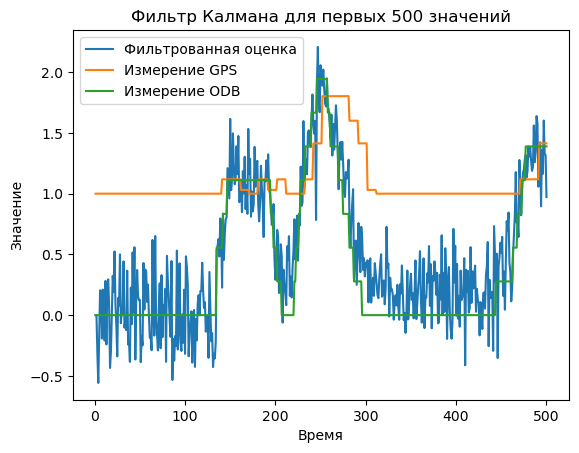

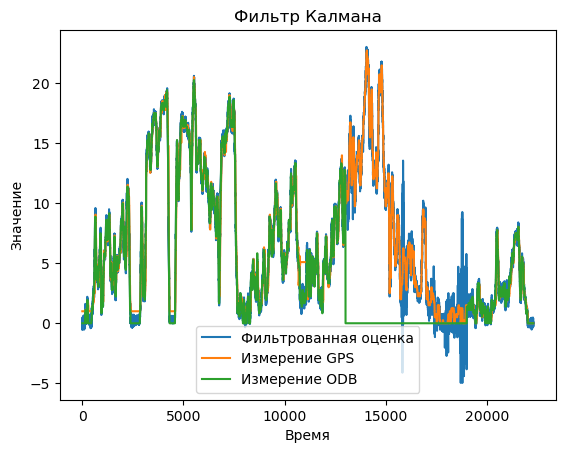

In [671]:
data = pd.read_csv('data1.csv', delimiter=',')
data.loc[(data['GPS Time'] > 'Fri Mar 25 17:40:00 GMT+03:00 2016') & (data['GPS Time'] < 'Fri Mar 25 17:50:00 GMT+03:00 2016'), 'Speed (OBD)(km/h)'] = 0
v, z_GPS, z_OBD = data_processor(data, 2)
plot_graf(v, z_GPS, z_OBD)


In [672]:
data = pd.read_csv('data1.csv', delimiter=',')

# 3.2 по Latitude (по широте [т.е. по y])

In [673]:
#3.2 по Latitude (по широте [т.е. по y])
Latitude = (data[' Latitude'].astype (float))*111.111*1000
Latitude = [Latitude[i] - Latitude[0] for i in range(N)]
N = len(data)

data['GPS Speed (Meters/second)'] = ['0' if elem == '-' else elem 
                                     for i, elem in enumerate(data['GPS Speed (Meters/second)'])]
sigmaGPS_arr = data[' Horizontal Dilution of Precision'].astype (float)
v_gps = np.array(data['GPS Speed (Meters/second)'].astype (float))
bearing = np.array(data[' Bearing'].astype (float))

#Берем какую-то из составляющих скорости...
v_gps_y = np.cos(bearing*np.pi/180)*v_gps

total_sigma_sens = sigmaGPS_arr.copy()
sigmaModel = sigmaGPS_arr.copy()
y = np.zeros(N)
pred = np.zeros(N)

y[0] = Latitude[0]
sigmak = 0

In [674]:
#пересчет скоростией и сигм
for i in range(N):
    sigmaModel[i] += 0.5
    #v[i], total_sigma_sens[i] = total_sensor_sigma(sigmaGPS_arr[i], v_gps_y[i],  sigmaODB, v_odb_y[i])
    v[i], total_sigma_sens[i] = v_gps_y[i], sigmaGPS_arr[i]

In [675]:
#3.2
#сам процесс фильтрации Калмана

for t in range(1, N-1):
    y[t+1], sigmak = predict1(y[t] + v[t]*0.1, sigmak, sigmaModel[t])
    pred[t+1] = y[t+1]
    y[t+1], sigmak = update1(sigmak, total_sigma_sens[t], y[t+1], Latitude[t+1])

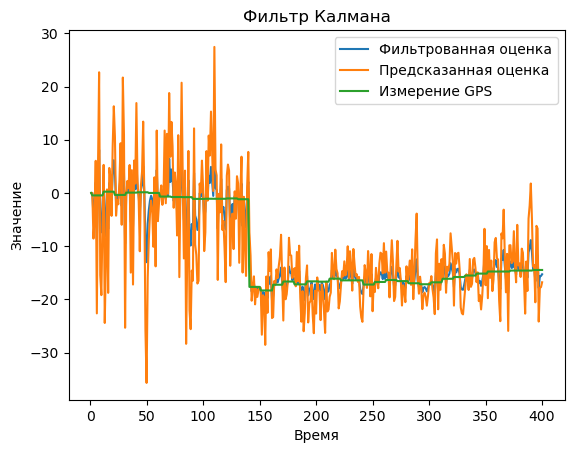

In [676]:
#Строим графики
plt.plot(range(1, 400 + 1), y[:400], label="Фильтрованная оценка")
plt.plot(range(1, 400 + 1), pred[:400], label="Предсказанная оценка")
plt.plot(range(1, 400 + 1), Latitude[:400], label="Измерение GPS")
plt.xlabel("Время")
plt.ylabel("Значение")
plt.title("Фильтр Калмана")
plt.legend()
plt.show()

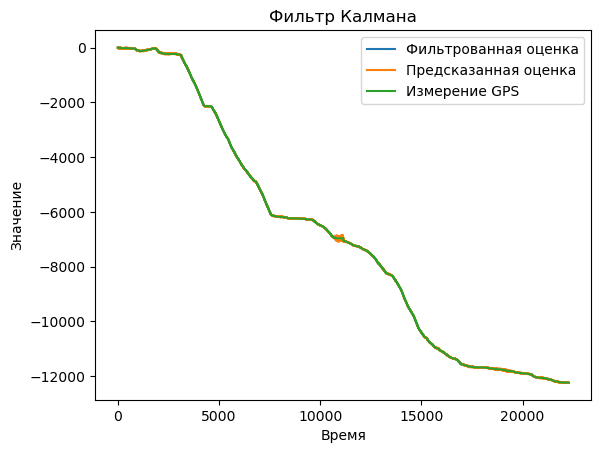

In [677]:
#Строим графики
plt.plot(range(1, N + 1), y, label="Фильтрованная оценка")
plt.plot(range(1, N + 1), pred, label="Предсказанная оценка")
plt.plot(range(1, N + 1), Latitude, label="Измерение GPS")

plt.xlabel("Время")
plt.ylabel("Значение")
plt.title("Фильтр Калмана")
plt.legend()
plt.show()


# 3.2 по Longitude (по долготе [т.е. по x])

In [678]:
#3.2 по Longitude (по долготе [т.е. по x])
Longitude = (data[' Longitude'].astype (float))
Latitude = (data[' Latitude'].astype (float))

avr_gr = np.cos((sum(Latitude)/len(Latitude))*np.pi/180)*111.111
Longitude = [avr_gr*Longitude[i]*1000 for i in range(N)]
Longitude = [Longitude[i] - Longitude[0] for i in range(N)]
N = len(data)

data['GPS Speed (Meters/second)'] = ['0' if elem == '-' else elem 
                                     for i, elem in enumerate(data['GPS Speed (Meters/second)'])]
sigmaGPS_arr = data[' Horizontal Dilution of Precision'].astype (float)
v_gps = np.array(data['GPS Speed (Meters/second)'].astype (float))
bearing = np.array(data[' Bearing'].astype (float))

#Берем какую-то из составляющих скорости...
v_gps_x = np.sin(bearing*np.pi/180)*v_gps

total_sigma_sens = sigmaGPS_arr.copy()
sigmaModel = sigmaGPS_arr.copy()
x = np.zeros(N)
pred = np.zeros(N)

x[0] = Longitude[0]
sigmak = 0

In [679]:
#пересчет скоростией и сигм
for i in range(N):
    sigmaModel[i] += 0.5
    #v[i], total_sigma_sens[i] = total_sensor_sigma(sigmaGPS_arr[i], v_gps_y[i],  sigmaODB, v_odb_y[i])
    v[i], total_sigma_sens[i] = v_gps_x[i], sigmaGPS_arr[i]

In [680]:
#3.2
#сам процесс фильтрации Калмана

for t in range(1, N-1):
    x[t+1], sigmak = predict1(x[t] + v[t]*0.1, sigmak, sigmaModel[t])
    pred[t+1] = x[t+1]
    x[t+1], sigmak = update1(sigmak, total_sigma_sens[t], x[t+1], Longitude[t+1])

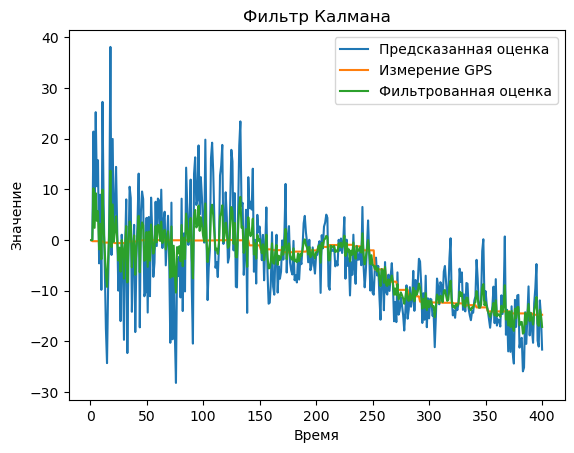

In [681]:
#Строим графики

plt.plot(range(1, 400 + 1), pred[:400], label="Предсказанная оценка")
plt.plot(range(1, 400 + 1), Longitude[:400], label="Измерение GPS")
plt.plot(range(1, 400 + 1), x[:400], label="Фильтрованная оценка")
plt.xlabel("Время")
plt.ylabel("Значение")
plt.title("Фильтр Калмана")
plt.legend()
plt.show()

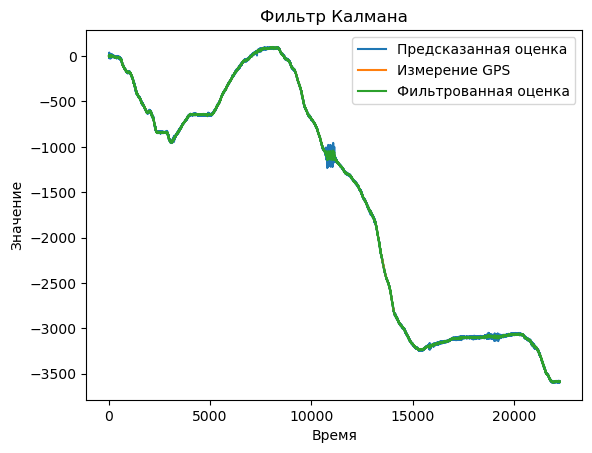

In [682]:
#Строим графики

plt.plot(range(1, N + 1), pred, label="Предсказанная оценка")
plt.plot(range(1, N + 1), Longitude, label="Измерение GPS")
plt.plot(range(1, N + 1), x, label="Фильтрованная оценка")

plt.xlabel("Время")
plt.ylabel("Значение")
plt.title("Фильтр Калмана")
plt.legend()
plt.show()